In [1]:
import sys
sys.path.insert(0, './../Libs/')
import numpy as np
from BasisFunction import BaseBasicFunction
from SoftMarginSVM import PrimalSoftMarginSVM
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.utils import shuffle

def _shuffle(X, t):
    X, t = shuffle(X, t.ravel())
    t = t.reshape(-1, 1)
    return (X, t)

def __t_convert(tsamples):
    for i in tsamples:
        yield (i - 0.5)*2

In [2]:
sampleNoise = 0.2
seed = 0
Nsamples = 20
NsamplesEachClass = int(Nsamples/2)

centers = [
    [0, 0],
    [0.5, 0.5]
]

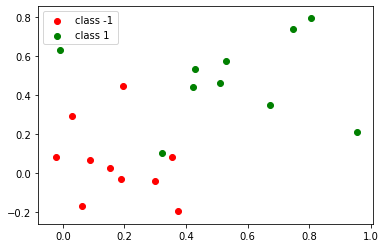

In [3]:
X, t = skdata.make_blobs(n_samples = [NsamplesEachClass, NsamplesEachClass], 
                         cluster_std = sampleNoise, random_state = seed, shuffle = False, centers = centers)

plt.scatter(X[:NsamplesEachClass, 0], X[:NsamplesEachClass, 1], c = 'r', label = "class -1")
plt.scatter(X[NsamplesEachClass:, 0], X[NsamplesEachClass:, 1], c = 'g', label = "class 1")
plt.legend()

done fitting, w = 
[[4.14148906]
 [6.36480976]]
b = -2.970545889882328
xi = 
[[4.99328011e-08]
 [8.04652635e-07]
 [4.86456787e-08]
 [4.93920323e-08]
 [5.05668655e-08]
 [4.93874291e-08]
 [4.93470692e-08]
 [5.00482870e-08]
 [4.95549390e-08]
 [1.97422606e+00]
 [4.88603421e-08]
 [4.91826960e-08]
 [4.94960717e-08]
 [4.90385296e-08]
 [4.87215075e-08]
 [4.86830464e-08]
 [4.90010348e-08]
 [5.95211542e-08]
 [1.69271247e+00]
 [2.15132012e-07]]


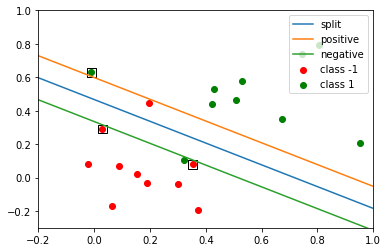

In [10]:
X, t = skdata.make_blobs(n_samples = [NsamplesEachClass, NsamplesEachClass], 
                         cluster_std = sampleNoise, random_state = seed, shuffle = False, centers = centers)

plt.scatter(X[:NsamplesEachClass, 0], X[:NsamplesEachClass, 1], c = 'r', label = "class -1")
plt.scatter(X[NsamplesEachClass:, 0], X[NsamplesEachClass:, 1], c = 'g', label = "class 1")

X, t = _shuffle(X, t)
t = np.array([i for i in __t_convert(t)]).reshape(-1, 1)
svm = PrimalSoftMarginSVM(X, t, 1000).fit()

w = svm.w.ravel()
a, b = w
c = svm.b
slope = -a/b
offset = -c/b

width = 1/np.sqrt(a*a + b*b)

w_xy = np.array([slope, offset]).reshape(-1, 1)
Xdraw = np.linspace(-0.2, 1.6, 100).reshape(-1, 1)
Xdraw_ = np.hstack((Xdraw, np.ones(100).reshape(-1, 1)))
ydraw = Xdraw_.dot(w_xy)

y_pos_draw = ydraw + width * np.ones(100).reshape(-1, 1)
y_neg_draw = ydraw - width * np.ones(100).reshape(-1, 1)

plt.plot(Xdraw, ydraw, label = "split")
plt.plot(Xdraw, y_pos_draw, label = "positive")
plt.plot(Xdraw, y_neg_draw, label = "negative")

sv_points = svm.supportVectorPoints()
Xmark = sv_points[:, 0].ravel()
ymark = sv_points[:, 1].ravel()

plt.scatter(Xmark, ymark, marker = 's', s=80, facecolors='none', edgecolors='k')

plt.xlim(-0.2, 1.0)
plt.ylim(-0.3, 1.0)
plt.legend()

In [11]:
print(svm.supportVectorPoints())

[[-0.01059796  0.63072372]
 [ 0.35281047  0.08003144]
 [ 0.02880871  0.2908547 ]]
